In [1]:
from sklearn.datasets import make_friedman2
from sklearn.gaussian_process import GaussianProcessRegressor

In [2]:
import numpy as np

#time = np.array([1165.8, 1166.8, 1170.82, 1174.85, 1178.77 , 1181.81, 1190.78,1202.84,1211.78,1239.74])
time = np.array([[1806.79],[1810.8],[1817.77],[1827.76],[1831.77],[1839.76]])

In [3]:
flux = np.array([17.004,15.576,15.309,16.327,16.967,18.131])

In [4]:
time

array([[1806.79],
       [1810.8 ],
       [1817.77],
       [1827.76],
       [1831.77],
       [1839.76]])

In [5]:
from sklearn.gaussian_process.kernels import RBF, WhiteKernel
kernel = 1.0 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e3)) \
    + WhiteKernel(noise_level=1e-5, noise_level_bounds=(1e-10, 1e+1))

In [6]:
gpr = GaussianProcessRegressor(kernel=kernel,alpha=0.0).fit(time, flux)

In [7]:
X_ = np.linspace(1806.79, 1839.76, 100)
y_mean, y_cov = gpr.predict(X_[:, np.newaxis], return_cov=True)

In [8]:
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


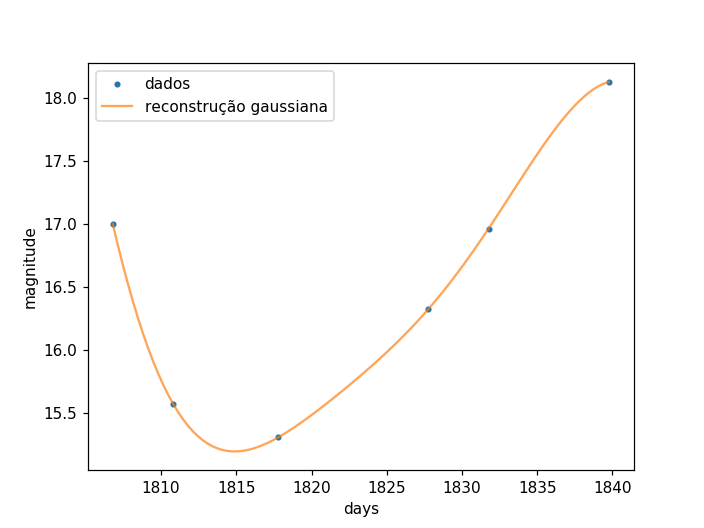

In [13]:
%matplotlib notebook

plt.plot(time[:, 0],flux,'.', alpha = 1, label='dados')
plt.plot(X_, y_mean, alpha = 0.7, label='reconstrução gaussiana')

plt.legend()
plt.xlabel('days')
plt.ylabel('magnitude')
plt.show()